## Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install eli5
!pip install mlxtend

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from numpy import mean, std
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import paired_ttest_kfold_cv, ftest

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 18.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=cb488b21f895478792dc5620d208ca2e227776fb6c154653a2c4a7061a820c0d
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
final_df = pd.read_excel("/content/drive/MyDrive/AdaBoost/Dataset.xlsx")
final_df.head()

,NIM,NAMA,PRODI,FAKULTAS,KELOMPOK UJIAN,S1,S2,S3,S4,S5,S6,SKS_S1,SKS_S2,SKS_S3,SKS_S4,SKS_S5,SKS_S6,STATUS
0,1101617001,RACHMAT HIDAYAT,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.51,3.639130,3.595833,3.504545,3.6000,3.652381,22.0,45.0,69.0,91.0,115.0,136.0,1
1,1101617002,ARIF BUDI SANTOSO,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.65,3.756522,3.645833,3.704545,3.6750,3.971429,22.0,45.0,69.0,91.0,115.0,136.0,1
2,1101617003,NURUL HISNA HERYANTO,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.53,3.569565,3.554167,3.759091,3.3750,3.617391,22.0,45.0,69.0,91.0,115.0,138.0,1
3,1101617004,ALDINO RAMADHAN,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.68,3.717391,3.370833,3.890909,3.7250,3.733333,22.0,45.0,69.0,91.0,115.0,136.0,1
4,1101617005,MUHAMMAD AZHAR THIFAL,11016-Teknologi Pendidikan,Fakultas Ilmu Pendidikan,SOSHUM,3.68,3.739130,3.687500,3.822727,3.5875,3.882609,22.0,45.0,69.0,91.0,115.0,138.0,1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8295 entries, 0 to 8294
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NIM             8295 non-null   int64  
 1   NAMA            8295 non-null   object 
 2   PRODI           8295 non-null   object 
 3   FAKULTAS        8295 non-null   object 
 4   KELOMPOK UJIAN  8295 non-null   object 
 5   S1              8295 non-null   float64
 6   S2              8295 non-null   float64
 7   S3              8295 non-null   float64
 8   S4              8295 non-null   float64
 9   S5              8295 non-null   float64
 10  S6              8295 non-null   float64
 11  SKS_S1          8295 non-null   float64
 12  SKS_S2          8295 non-null   float64
 13  SKS_S3          8295 non-null   float64
 14  SKS_S4          8295 non-null   float64
 15  SKS_S5          8295 non-null   float64
 16  SKS_S6          8295 non-null   float64
 17  STATUS          8295 non-null   i

In [ ]:
final_df["NIM"] = final_df["NIM"].astype('str')
final_df["STATUS"] = final_df["STATUS"].astype('str')

## EDA

In [ ]:
final_df.describe()

,S1,S2,S3,S4,S5,S6,SKS_S1,SKS_S2,SKS_S3,SKS_S4,SKS_S5,SKS_S6
count,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000
mean,3.471486,3.503894,3.493651,3.518129,3.531192,3.635053,20.628451,42.638336,64.829777,87.027486,109.094997,130.188788
std,0.243769,0.240872,0.253280,0.258702,0.270658,0.228191,1.313197,2.813061,4.321893,5.902815,7.601013,9.181412
min,2.470000,2.211111,2.000000,2.226667,2.000000,2.000000,17.000000,34.000000,37.000000,41.000000,45.000000,47.000000
25%,3.310000,3.358333,3.347826,3.370000,3.377273,3.513636,20.000000,41.000000,63.000000,84.000000,106.000000,127.000000
50%,3.500000,3.536364,3.533333,3.565217,3.583333,3.678261,21.000000,44.000000,66.000000,89.000000,111.000000,132.000000
75%,3.660000,3.686957,3.677525,3.709307,3.734783,3.800000,22.000000,45.000000,68.000000,91.000000,115.000000,136.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000,46.000000,71.000000,94.000000,119.000000,142.000000


In [ ]:
final_df.describe(include=[object])

,NIM,NAMA,PRODI,FAKULTAS,KELOMPOK UJIAN,STATUS
count,8295,8295,8295,8295,8295,8295
unique,8295,8247,54,8,2,2
top,1101617001,NURUL AZIZAH,11076-Pendidikan Guru Sekolah Dasar,Fakultas Ilmu Pendidikan,SOSHUM,0
freq,1,4,509,1607,6586,4165


In [ ]:
final_df['STATUS'].value_counts()

0    4165
1    4130
Name: STATUS, dtype: int64

In [ ]:
IPS = pd.DataFrame({'S1': final_df['S1'],'S2': final_df['S2'],'S3': final_df['S3'],'S4': final_df['S4'],'S5': final_df['S5'],'S6': final_df['S6']})
IPS.head()

,S1,S2,S3,S4,S5,S6
0,3.51,3.639130,3.595833,3.504545,3.6000,3.652381
1,3.65,3.756522,3.645833,3.704545,3.6750,3.971429
2,3.53,3.569565,3.554167,3.759091,3.3750,3.617391
3,3.68,3.717391,3.370833,3.890909,3.7250,3.733333
4,3.68,3.739130,3.687500,3.822727,3.5875,3.882609


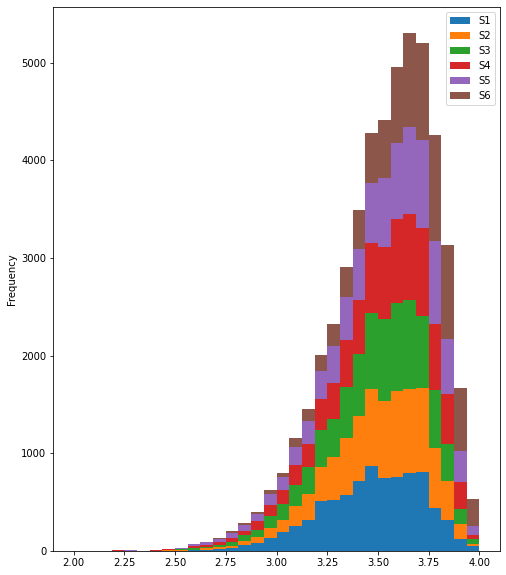

In [ ]:
IPS.plot.hist(figsize=(8, 10), bins=32, stacked="True")

## Model 1 (Smt 1)

In [ ]:
feature_columns1 = ['S1','SKS_S1']
X1 = final_df[feature_columns1]
y1 = final_df['STATUS']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=35, test_size=0.2, shuffle=True)

In [ ]:
cv = KFold(n_splits=10, random_state=35, shuffle=True)

In [ ]:
model11 = AdaBoostClassifier()
scores11 = cross_val_score(model11, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores11), std(scores11)))

Accuracy: 0.577 (0.028)


In [ ]:
scores11

array([0.55722892, 0.55873494, 0.57831325, 0.56626506, 0.55722892,
       0.52409639, 0.60180995, 0.60180995, 0.62443439, 0.59879336])

In [ ]:
model12 = DecisionTreeClassifier()
scores12 = cross_val_score(model12, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores12), std(scores12)))

Accuracy: 0.555 (0.019)


In [ ]:
scores12

array([0.53012048, 0.53162651, 0.57680723, 0.54518072, 0.55722892,
       0.5376506 , 0.56259427, 0.56711916, 0.5520362 , 0.59426848])

In [ ]:
model13 = RandomForestClassifier()
scores13 = cross_val_score(model13, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores13), std(scores13)))

Accuracy: 0.551 (0.021)


In [ ]:
scores13

array([0.52409639, 0.52409639, 0.57831325, 0.54518072, 0.54066265,
       0.5436747 , 0.54298643, 0.55505279, 0.56108597, 0.59426848])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

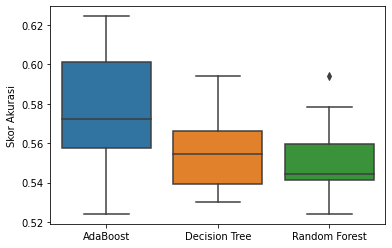

In [ ]:
scores1 = [scores11, scores12, scores13]
sns.boxplot(data=scores1).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

In [ ]:
y_pred11 = cross_val_predict(model11, X1_train, y1_train, cv=cv)
y_pred12 = cross_val_predict(model12, X1_train, y1_train, cv=cv)
y_pred13 = cross_val_predict(model13, X1_train, y1_train, cv=cv)
y1_val = y1_train.values

In [ ]:
f, p = ftest(y1_val, y_pred11, y_pred12, y_pred13)

# summarize
print('P-value: %.3f, F-Statistic: %.3f' % (p, f))
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, F-Statistic: 12.190
Difference between mean performance is probably real


/usr/local/lib/python3.8/dist-packages/mlxtend/evaluate/f_test.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ary = np.hstack(((y_target == mod).reshape(-1, 1) for


In [ ]:
# Bonferroni Correction
alpha = 0.05/3

In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model11, estimator2=model12, cv=10, X=X1_train.to_numpy(), y=y1_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.023, t-Statistic: 2.733
Algorithms probably have the same performance


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model11, estimator2=model13, cv=10, X=X1_train.to_numpy(), y=y1_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.007, t-Statistic: 3.474
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model12, estimator2=model13, cv=10, X=X1_train.to_numpy(), y=y1_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.965, t-Statistic: 0.045
Algorithms probably have the same performance


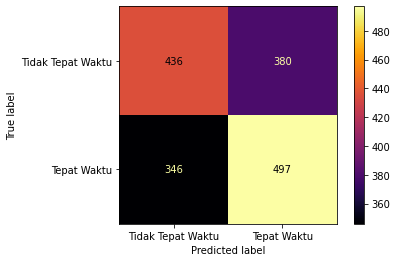

In [ ]:
model1 = AdaBoostClassifier(random_state=35)
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y1_test, y_pred1, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report1 = classification_report(y1_test, y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.56      0.53      0.55       816
           1       0.57      0.59      0.58       843

    accuracy                           0.56      1659
   macro avg       0.56      0.56      0.56      1659
weighted avg       0.56      0.56      0.56      1659



## Model 2 (Smt 2)

In [ ]:
feature_columns2 = ['S1','S2','SKS_S2']
X2 = final_df[feature_columns2]
y2 = final_df['STATUS']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=35, test_size=0.2, shuffle=True)

In [ ]:
model21 = AdaBoostClassifier()
scores21 = cross_val_score(model21, X2_train, y2_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores21), std(scores21)))

Accuracy: 0.587 (0.019)


In [ ]:
scores21

array([0.5753012 , 0.57228916, 0.56777108, 0.59337349, 0.57228916,
       0.56024096, 0.59276018, 0.61840121, 0.61085973, 0.60331825])

In [ ]:
model22 = DecisionTreeClassifier()
scores22 = cross_val_score(model22, X2_train, y2_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores22), std(scores22)))

Accuracy: 0.537 (0.023)


In [ ]:
scores22

array([0.5       , 0.51054217, 0.55722892, 0.55873494, 0.53614458,
       0.52409639, 0.53393665, 0.52337858, 0.58220211, 0.54298643])

In [ ]:
model23 = RandomForestClassifier()
scores23 = cross_val_score(model23, X2_train, y2_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores23), std(scores23)))

Accuracy: 0.557 (0.018)


In [ ]:
scores23

array([0.54066265, 0.5376506 , 0.5873494 , 0.57078313, 0.54216867,
       0.54216867, 0.57013575, 0.53846154, 0.58220211, 0.55354449])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

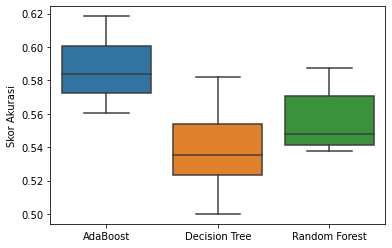

In [ ]:
scores2 = [scores21, scores22, scores23]
sns.boxplot(data=scores2).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

In [ ]:
y_pred21 = cross_val_predict(model21, X2_train, y2_train, cv=cv)
y_pred22 = cross_val_predict(model22, X2_train, y2_train, cv=cv)
y_pred23 = cross_val_predict(model23, X2_train, y2_train, cv=cv)
y2_val = y2_train.values

In [ ]:
f, p = ftest(y2_val, y_pred21, y_pred22, y_pred23)

# summarize
print('P-value: %.3f, F-Statistic: %.3f' % (p, f))
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, F-Statistic: 26.602
Difference between mean performance is probably real


/usr/local/lib/python3.8/dist-packages/mlxtend/evaluate/f_test.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ary = np.hstack(((y_target == mod).reshape(-1, 1) for


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model21, estimator2=model22, cv=10, X=X2_train.to_numpy(), y=y2_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: 6.862
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model21, estimator2=model23, cv=10, X=X2_train.to_numpy(), y=y2_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.003, t-Statistic: 4.039
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model22, estimator2=model23, cv=10, X=X2_train.to_numpy(), y=y2_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.005, t-Statistic: -3.706
Difference between mean performance is probably real


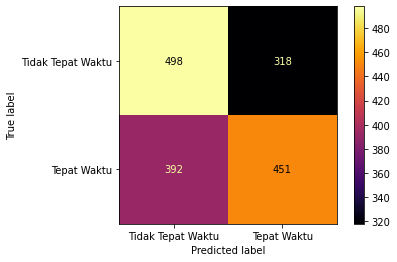

In [ ]:
model2 = AdaBoostClassifier(random_state=35)
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y2_test, y_pred2, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report2 = classification_report(y2_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       816
           1       0.59      0.53      0.56       843

    accuracy                           0.57      1659
   macro avg       0.57      0.57      0.57      1659
weighted avg       0.57      0.57      0.57      1659



## Model 3 (Smt 3)

In [ ]:
feature_columns3 = ['S1','S2','S3','SKS_S3']
X3 = final_df[feature_columns3]
y3 = final_df['STATUS']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=35, test_size=0.2, shuffle=True)

In [ ]:
model31 = AdaBoostClassifier()
scores31 = cross_val_score(model31, X3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores31), std(scores31)))

Accuracy: 0.600 (0.013)


In [ ]:
scores31

array([0.60542169, 0.59487952, 0.58584337, 0.60692771, 0.5813253 ,
       0.58584337, 0.59426848, 0.61840121, 0.60030166, 0.62292609])

In [ ]:
model32 = DecisionTreeClassifier()
scores32 = cross_val_score(model32, X3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores32), std(scores32)))

Accuracy: 0.546 (0.009)


In [ ]:
scores32

array([0.53162651, 0.55120482, 0.5436747 , 0.54066265, 0.54216867,
       0.54819277, 0.53996983, 0.56108597, 0.56259427, 0.53996983])

In [ ]:
model33 = RandomForestClassifier()
scores33 = cross_val_score(model33, X3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores33), std(scores33)))

Accuracy: 0.580 (0.016)


In [ ]:
scores33

array([0.59939759, 0.58283133, 0.55722892, 0.59036145, 0.55421687,
       0.57680723, 0.56862745, 0.60784314, 0.57767722, 0.58974359])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

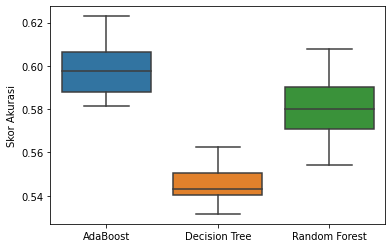

In [ ]:
scores3 = [scores31, scores32, scores33]
sns.boxplot(data=scores3).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

In [ ]:
y_pred31 = cross_val_predict(model31, X3_train, y3_train, cv=cv)
y_pred32 = cross_val_predict(model32, X3_train, y3_train, cv=cv)
y_pred33 = cross_val_predict(model33, X3_train, y3_train, cv=cv)
y3_val = y3_train.values

In [ ]:
f, p = ftest(y3_val, y_pred31, y_pred32, y_pred33)

# summarize
print('P-value: %.3f, F-Statistic: %.3f' % (p, f))
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, F-Statistic: 29.651
Difference between mean performance is probably real


/usr/local/lib/python3.8/dist-packages/mlxtend/evaluate/f_test.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ary = np.hstack(((y_target == mod).reshape(-1, 1) for


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model31, estimator2=model32, cv=10, X=X3_train.to_numpy(), y=y3_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: 11.538
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model31, estimator2=model33, cv=10, X=X3_train.to_numpy(), y=y3_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.002, t-Statistic: 4.278
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model32, estimator2=model33, cv=10, X=X3_train.to_numpy(), y=y3_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: -6.748
Difference between mean performance is probably real


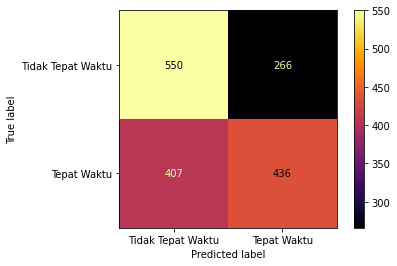

In [ ]:
model3 = AdaBoostClassifier(random_state=35)
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y3_test, y_pred3, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report3 = classification_report(y3_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.57      0.67      0.62       816
           1       0.62      0.52      0.56       843

    accuracy                           0.59      1659
   macro avg       0.60      0.60      0.59      1659
weighted avg       0.60      0.59      0.59      1659



## Model 4 (Smt 4)

In [ ]:
feature_columns4 = ['S1','S2','S3','S4','SKS_S4']
X4 = final_df[feature_columns4]
y4 = final_df['STATUS']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=35, test_size=0.2, shuffle=True)

In [ ]:
model41 = AdaBoostClassifier()
scores41 = cross_val_score(model41, X4_train, y4_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores41), std(scores41)))

Accuracy: 0.611 (0.016)


In [ ]:
scores41

array([0.63253012, 0.60993976, 0.6310241 , 0.59487952, 0.63403614,
       0.58885542, 0.59276018, 0.60180995, 0.6214178 , 0.60633484])

In [ ]:
model42 = DecisionTreeClassifier()
scores42 = cross_val_score(model42, X4_train, y4_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores42), std(scores42)))

Accuracy: 0.552 (0.017)


In [ ]:
scores42

array([0.55722892, 0.54668675, 0.54819277, 0.5436747 , 0.52259036,
       0.55572289, 0.53544495, 0.59125189, 0.56259427, 0.55806938])

In [ ]:
model43 = RandomForestClassifier()
scores43 = cross_val_score(model43, X4_train, y4_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores43), std(scores43)))

Accuracy: 0.602 (0.020)


In [ ]:
scores43

array([0.63554217, 0.57831325, 0.61746988, 0.58433735, 0.5873494 ,
       0.60090361, 0.57466063, 0.60633484, 0.61387632, 0.62594268])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

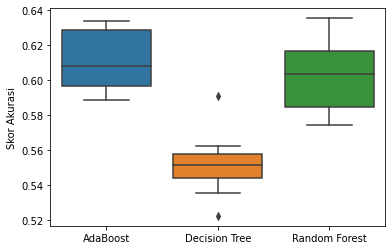

In [ ]:
scores4 = [scores41, scores42, scores43]
sns.boxplot(data=scores4).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

In [ ]:
y_pred41 = cross_val_predict(model41, X4_train, y4_train, cv=cv)
y_pred42 = cross_val_predict(model42, X4_train, y4_train, cv=cv)
y_pred43 = cross_val_predict(model43, X4_train, y4_train, cv=cv)
y4_val = y4_train.values

In [ ]:
f, p = ftest(y4_val, y_pred41, y_pred42, y_pred43)

# summarize
print('P-value: %.3f, F-Statistic: %.3f' % (p, f))
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, F-Statistic: 43.826
Difference between mean performance is probably real


/usr/local/lib/python3.8/dist-packages/mlxtend/evaluate/f_test.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ary = np.hstack(((y_target == mod).reshape(-1, 1) for


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model41, estimator2=model42, cv=10, X=X4_train.to_numpy(), y=y4_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: 6.454
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model41, estimator2=model43, cv=10, X=X4_train.to_numpy(), y=y4_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.427, t-Statistic: 0.831
Algorithms probably have the same performance


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model42, estimator2=model43, cv=10, X=X4_train.to_numpy(), y=y4_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: -7.177
Difference between mean performance is probably real


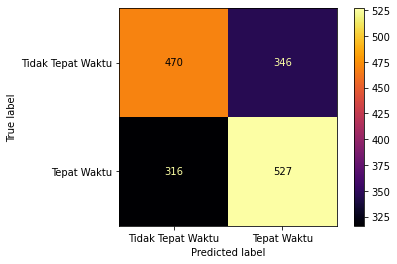

In [ ]:
model4 = AdaBoostClassifier(random_state=35)
model4.fit(X4_train, y4_train)
y_pred4 = model4.predict(X4_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y4_test, y_pred4, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report4 = classification_report(y4_test, y_pred4)
print(report4)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       816
           1       0.60      0.63      0.61       843

    accuracy                           0.60      1659
   macro avg       0.60      0.60      0.60      1659
weighted avg       0.60      0.60      0.60      1659



## Model 5 (Smt 5)

In [ ]:
feature_columns5 = ['S1','S2','S3','S4','S5','SKS_S5']
X5 = final_df[feature_columns5]
y5 = final_df['STATUS']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=35, test_size=0.2, shuffle=True)

In [ ]:
model51 = AdaBoostClassifier()
scores51 = cross_val_score(model51, X5_train, y5_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores51), std(scores51)))

Accuracy: 0.608 (0.018)


In [ ]:
scores51

array([0.61445783, 0.60692771, 0.61445783, 0.58584337, 0.64457831,
       0.60240964, 0.57616893, 0.60331825, 0.61085973, 0.62292609])

In [ ]:
model52 = DecisionTreeClassifier()
scores52 = cross_val_score(model52, X5_train, y5_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores52), std(scores52)))

Accuracy: 0.566 (0.017)


In [ ]:
scores52

array([0.59638554, 0.55572289, 0.5813253 , 0.56777108, 0.55271084,
       0.57078313, 0.55656109, 0.53242836, 0.57616893, 0.56711916])

In [ ]:
model53 = RandomForestClassifier()
scores53 = cross_val_score(model53, X5_train, y5_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores53), std(scores53)))

Accuracy: 0.625 (0.015)


In [ ]:
scores53

array([0.63554217, 0.60542169, 0.65210843, 0.62349398, 0.62349398,
       0.62048193, 0.59879336, 0.62443439, 0.64555053, 0.6199095 ])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

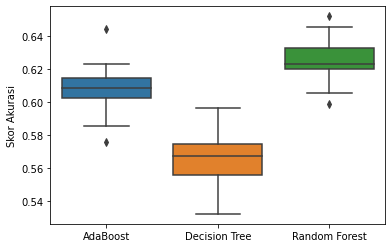

In [ ]:
scores5 = [scores51, scores52, scores53]
sns.boxplot(data=scores5).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

In [ ]:
y_pred51 = cross_val_predict(model51, X5_train, y5_train, cv=cv)
y_pred52 = cross_val_predict(model52, X5_train, y5_train, cv=cv)
y_pred53 = cross_val_predict(model53, X5_train, y5_train, cv=cv)
y5_val = y5_train.values

In [ ]:
f, p = ftest(y5_val, y_pred51, y_pred52, y_pred53)

# summarize
print('P-value: %.3f, F-Statistic: %.3f' % (p, f))
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, F-Statistic: 32.134
Difference between mean performance is probably real


/usr/local/lib/python3.8/dist-packages/mlxtend/evaluate/f_test.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ary = np.hstack(((y_target == mod).reshape(-1, 1) for


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model51, estimator2=model52, cv=10, X=X5_train.to_numpy(), y=y5_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: 5.888
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model51, estimator2=model53, cv=10, X=X5_train.to_numpy(), y=y5_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.468, t-Statistic: -0.757
Algorithms probably have the same performance


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model52, estimator2=model53, cv=10, X=X5_train.to_numpy(), y=y5_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: -6.181
Difference between mean performance is probably real


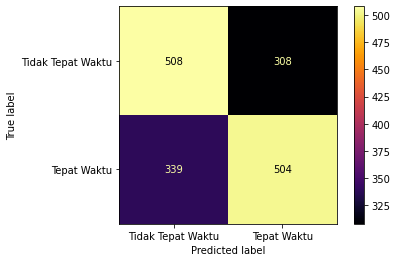

In [ ]:
model5 = RandomForestClassifier(random_state=35)
model5.fit(X5_train, y5_train)
y_pred5 = model5.predict(X5_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y5_test, y_pred5, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report5 = classification_report(y5_test, y_pred5)
print(report5)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       816
           1       0.62      0.60      0.61       843

    accuracy                           0.61      1659
   macro avg       0.61      0.61      0.61      1659
weighted avg       0.61      0.61      0.61      1659



## Model 6 (Smt 6)

In [ ]:
feature_columns6 = ['S1','S2','S3','S4','S5','S6','SKS_S6']
X6 = final_df[feature_columns6]
y6 = final_df['STATUS']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=35, test_size=0.2, shuffle=True)

In [ ]:
model61 = AdaBoostClassifier()
scores61 = cross_val_score(model61, X6_train, y6_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores61), std(scores61)))

Accuracy: 0.627 (0.023)


In [ ]:
scores61

array([0.65060241, 0.60993976, 0.64909639, 0.62048193, 0.66114458,
       0.60993976, 0.62443439, 0.57767722, 0.62895928, 0.63800905])

In [ ]:
model62 = DecisionTreeClassifier(random_state=35)
scores62 = cross_val_score(model62, X6_train, y6_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores62), std(scores62)))

Accuracy: 0.598 (0.022)


In [ ]:
scores62

array([0.61295181, 0.5813253 , 0.61295181, 0.57078313, 0.62951807,
       0.59638554, 0.57164404, 0.57013575, 0.62443439, 0.61236802])

In [ ]:
model63 = RandomForestClassifier()
scores63 = cross_val_score(model63, X6_train, y6_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores63), std(scores63)))

Accuracy: 0.649 (0.017)


In [ ]:
scores63

array([0.67168675, 0.6310241 , 0.64759036, 0.64909639, 0.6746988 ,
       0.64156627, 0.64253394, 0.62895928, 0.67119155, 0.63348416])

[Text(0, 0.5, 'Skor Akurasi'),
 [Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')]]

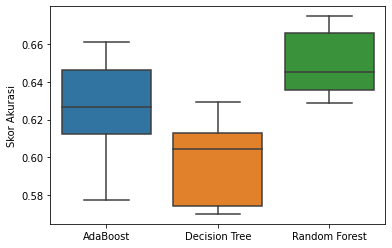

In [ ]:
scores6 = [scores61, scores62, scores63]
sns.boxplot(data=scores6).set(xticklabels=['AdaBoost', 'Decision Tree', 'Random Forest'], ylabel='Skor Akurasi')

In [ ]:
y_pred61 = cross_val_predict(model61, X6_train, y6_train, cv=cv)
y_pred62 = cross_val_predict(model62, X6_train, y6_train, cv=cv)
y_pred63 = cross_val_predict(model63, X6_train, y6_train, cv=cv)
y6_val = y6_train.values

In [ ]:
f, p = ftest(y6_val, y_pred61, y_pred62, y_pred63)

# summarize
print('P-value: %.3f, F-Statistic: %.3f' % (p, f))
# interpret the result
if p <= 0.05:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, F-Statistic: 33.823
Difference between mean performance is probably real


/usr/local/lib/python3.8/dist-packages/mlxtend/evaluate/f_test.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  ary = np.hstack(((y_target == mod).reshape(-1, 1) for


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model61, estimator2=model62, cv=10, X=X6_train.to_numpy(), y=y6_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: 5.531
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model61, estimator2=model63, cv=10, X=X6_train.to_numpy(), y=y6_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.004, t-Statistic: -3.828
Difference between mean performance is probably real


In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=model62, estimator2=model63, cv=10, X=X6_train.to_numpy(), y=y6_train.to_numpy(), 
                             scoring='accuracy', random_seed=35, shuffle=True)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= alpha:
 print('Difference between mean performance is probably real')
else:
 print('Algorithms probably have the same performance')

P-value: 0.000, t-Statistic: -7.753
Difference between mean performance is probably real


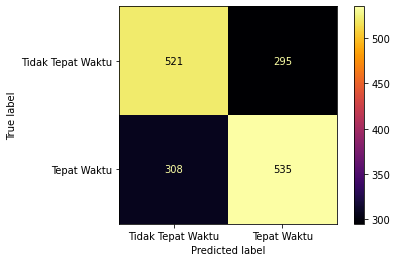

In [ ]:
model63 = RandomForestClassifier(random_state=35)
model63.fit(X6_train, y6_train)
y_pred6 = model63.predict(X6_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y6_test, y_pred6, display_labels = ['Tidak Tepat Waktu', 'Tepat Waktu'], cmap='inferno')
plt.show()

In [ ]:
report6 = classification_report(y6_test, y_pred6)
print(report6)

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       816
           1       0.64      0.63      0.64       843

    accuracy                           0.64      1659
   macro avg       0.64      0.64      0.64      1659
weighted avg       0.64      0.64      0.64      1659



## Feature Importance

In [ ]:
model61.fit(X6_train, y6_train)
perm1 = PermutationImportance(model61, random_state=35).fit(X6_test, y6_test)
eli5.show_weights(perm1, feature_names = X6_test.columns.tolist())

Weight,Feature
0.0506 ± 0.0135,SKS_S6
0.0321 ± 0.0196,S6
0.0181 ± 0.0099,S3
0.0072 ± 0.0108,S4
0.0061 ± 0.0044,S1
0.0047 ± 0.0103,S2
0.0017 ± 0.0097,S5


In [ ]:
model62.fit(X6_train, y6_train)
perm2 = PermutationImportance(model62, random_state=35).fit(X6_test, y6_test)
eli5.show_weights(perm2, feature_names = X6_test.columns.tolist())

Weight,Feature
0.0558 ± 0.0204,SKS_S6
0.0282 ± 0.0184,S6
0.0140 ± 0.0115,S2
0.0065 ± 0.0169,S5
0.0035 ± 0.0187,S4
-0.0033 ± 0.0133,S3
-0.0076 ± 0.0147,S1


In [ ]:
perm3 = PermutationImportance(model63, random_state=35).fit(X6_test, y6_test)
eli5.show_weights(perm3, feature_names = X6_test.columns.tolist())

Weight,Feature
0.0807 ± 0.0103,SKS_S6
0.0418 ± 0.0217,S6
0.0224 ± 0.0083,S5
0.0203 ± 0.0116,S2
0.0192 ± 0.0113,S3
0.0186 ± 0.0100,S4
0.0051 ± 0.0114,S1
